# HW 05 - Taming Text

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import pickle

### Data description

The data can be found in the folder: `hillary-clinton-emails`. Detailed information about the schema can be found [here](https://www.kaggle.com/kaggle/hillary-clinton-emails). We will start of by using `pandas` to explore the size and contents of the data.

In [2]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
print(emails.shape)
emails.ix[:5,:11]

(7945, 22)


,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,HRC_Email_296


In [3]:
emails.ix[:5,11:]

,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,Meet The Right Wing Extremist Behind Anti-Musl...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


## Exercise 1

### Generate a word cloud on the raw corpus. With the help of `nltk`, implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

So we first make a word cloud on the raw corpus without performing any pre-processing. That is, we will make a word cloud from the last column of the `emails` DataFrame - `RawText`.

In [4]:
from wordcloud import WordCloud

# concatenate the raw email text extracted from the PDFs released by the US State Department
raw_text = emails.RawText
raw_text_concat = " ".join(raw_text)

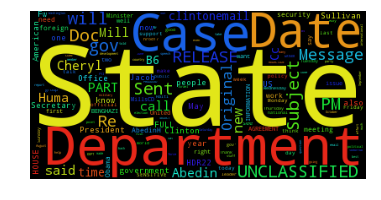

In [5]:
# Generate a word cloud image
wordcloud = WordCloud().generate(raw_text_concat)

# Display the generated image
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We will also try with just the `ExtractedBodyText` and `MetadataSubject` fields. We chose `MetadataSubject` rather than `ExtractedSubject` as the latter has more `NaN`'s and also has `Fw` and `Re` while `MetadataSubject` doesn't.

In [6]:
extracted_body = emails.ExtractedBodyText.dropna()
print(len(emails))
print(len(extracted_body))

7945
6742


In [7]:
extracted_subj = emails.ExtractedSubject.dropna()
len(extracted_subj)

6260

In [8]:
extracted_metasubj = emails.MetadataSubject.dropna()
len(extracted_metasubj)

7649

By using `ExtractedBodyText` and `MetadataSubject`, we are not dropping a significant amount of the entries.

Now we concanate all the text in order to create the word cloud.

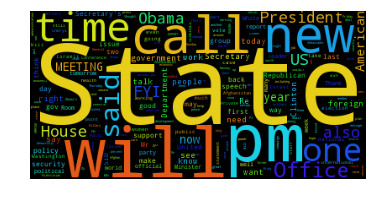

In [9]:
extracted_body_concat = " ".join(extracted_body)
extracted_metasubj_concat = " ".join(extracted_metasubj)
extracted_body_metasubj = extracted_body_concat + " " + extracted_metasubj_concat

# Generate a word cloud image
wordcloud_raw = WordCloud().generate(extracted_body_metasubj)

# Display the generated image
plt.figure()
plt.imshow(wordcloud_raw)
plt.axis("off")
plt.show()

#### Text pre-processing

Now we will perform some pre-processing with `nltk` as was taught in class. We first begin with tokenization.

In [10]:
tokens_body_subj = nltk.word_tokenize(extracted_body_metasubj)

In [11]:
len(tokens_body_subj)

735720

Now we will perform stop word removal. We will import the standard English stop words from `nltk` and also include some stop words specific to emails.

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
local_stop = {"Re", "RE", "Fw", "FW", "Cc", "also", "PM", "AM", "pm", "am", "btw", "fyi", "FYI", "to", "from", "To", "From"}
stop_words = stop_words | local_stop

In [13]:
filtered_content = [w for w in tokens_body_subj if not w in stop_words]
len(filtered_content)

508557

Now we will perform stemming.

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [15]:
stemmed_content = [ps.stem(word) for word in filtered_content]

In [16]:
print(len(set(filtered_content)))
print(len(set(stemmed_content)))

44376
34798


Let's check out the word cloud after performing the above steps (tokenization, stop word removal, and stemming.

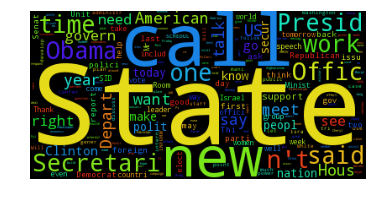

In [17]:
wordcloud = WordCloud().generate(" ".join(stemmed_content))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We observe that we get some strange "words" due to stemming such as "Thi", "Presid", and "Secretari". While this may be alright for those examples, it could be that two unrelated words are stemmed.

For this reason, we will use Lemmatization which actually gives words and to (more safely) avoid a stem for two (or more) unrelated words.

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_content = [lemmatizer.lemmatize(word) for word in filtered_content]

In [19]:
print(len(set(filtered_content)))
print(len(set(lemmatized_content)))

44376
42072


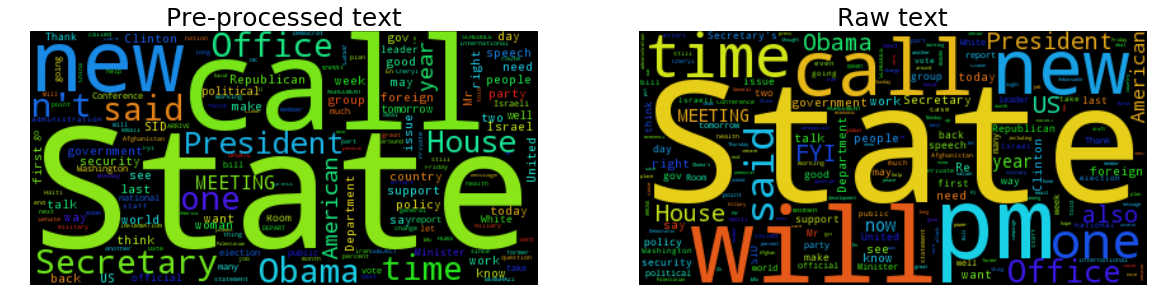

In [20]:
wordcloud_proc = WordCloud().generate(" ".join(lemmatized_content))

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_proc)
plt.title('Pre-processed text', fontsize=25)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_raw)
plt.title('Raw text', fontsize=25)
plt.axis("off")

plt.show()

When comparing this newly generated word cloud ("Pre-processed text") with the one from the raw `ExtractedBodyText` and `MetadataSubject` entries ("Raw text"), we observe the following pros (+) and cons (-):

_Raw word cloud: <br>_
\+ No bias from our side in removing words <br>
\- Words that are unrepresentative of the content may overshadow the more "interesting" ones (e.g. "Re" and "Fw" have a lot of occurences) <br>

_Pre-processed word cloud: <br>_
\+ Seems to be more representative of the content as certain stop words are removed <br>
\- When using stemming, you may obtain words that are not really words OR two (or more) unrelated words may be stemmed as one (which is why we chose to use Lemmatization) <br>
\- During pre-processing, we may introduce some bias when parsing / removing text

## Exercise 2

### Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (HINT: remember that there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.) Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level) that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo methods from the sentiment analysis module -- can you find substantial differences?

We checked out the `nltk.sentiment.util` module (http://www.nltk.org/_modules/nltk/sentiment/util.html) and found two useful demos for sentiment analysis:

* demo_vader_instance
* demo_liu_hu_lexicon

These methods print the result instead of returning the polarity information so we will write our own functions.

In [21]:
# vader sentimanet analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer() # so we don't need to keep creating a new object

def sentiment_vader(text):
    return sid.polarity_scores(text)    

In [22]:
# liu hu lexicon sentiment analysis
# adapted from http://www.nltk.org/_modules/nltk/sentiment/util.html - demo_liu_hu_lexicon
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank
tokenizer = treebank.TreebankWordTokenizer()

def sentiment_liu_hu(text):
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(text)]

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
        elif word in opinion_lexicon.negative():
            neg_words += 1

    if pos_words > neg_words:
        return 1
    elif pos_words < neg_words:
        return -1
    elif pos_words == neg_words:
        return 0

However, assigning only positive / negative sentiment (`sentiment_liu_hu`) may be too rash so we modified the above function to instead return the difference between the ratio of positive and the ratio of negative words.

In [23]:
# assigning only positive and negative may be too rash, we should somehow take into account the number 
# of words and the difference between the number of positive words and the number of negative words
def sentiment_liu_hu_mod(text):
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(text)]

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
        elif word in opinion_lexicon.negative():
            neg_words += 1
            
    return (pos_words - neg_words)/len(tokenized_sent)

### Simple sentiment analysis example

Let's try a couple examples, taken from `nltk`'s page (http://www.nltk.org/howto/sentiment.html).

In [24]:
sentences = ["VADER is smart, handsome, and funny.", 
             "A really bad, horrible book.",
            "The plot was good, but the characters are uncompelling and the dialog is not great."]

In [26]:
for sentence in sentences:
    print("SENTENCE: " + sentence)
    print("Vader: %0.3f" % sentiment_vader(sentence)["compound"])
    print("Liu and Hu: %0.3f" % sentiment_liu_hu(sentence))
    print("Modified Liu and Hu: %0.3f" % sentiment_liu_hu_mod(sentence))
    print()

SENTENCE: VADER is smart, handsome, and funny.
Vader: 0.832
Liu and Hu: 1.000
Modified Liu and Hu: 0.111

SENTENCE: A really bad, horrible book.
Vader: -0.821
Liu and Hu: -1.000
Modified Liu and Hu: -0.286

SENTENCE: The plot was good, but the characters are uncompelling and the dialog is not great.
Vader: -0.704
Liu and Hu: 1.000
Modified Liu and Hu: 0.059



The modified Liu and Hu version will rarely give really polarized results (close to +1 or -1) since almost all words need to be positive / negative for this to happen. However, it seems to do a better job at staying neutral for ambiguous cases like the last sentence. In any case, it won't require that much extra computation to try it out with the emails since we can compute the original Lu and Hiu score by simply taking the sign. So let's try it out!

### Creating a dictionary to detect countries from text

We will use `pycountry` to get the list of countries.

In [27]:
import pycountry
countries = []
for country in pycountry.countries:
    try:
        countries.append(country.common_name)
    except:
        countries.append(country.name)
len(countries)

249

After looking at the country names, we realized that we needed to do some automated (and manual) edits to get some country names to what they are commonly referred to.

In [33]:
# drop funny extensions
countries_clean = [country.split(",")[0].split("(")[0] for country in countries]

# manual edits
countries_clean.remove("Russian Federation"); countries_clean.append("Russia")
countries_clean.remove("Holy See "); countries_clean.append("Vatican")
countries_clean.remove("Viet Nam"); countries_clean.append("Vietnam")
countries_clean.remove("Syrian Arab Republic"); countries_clean.append("Syria")
countries_clean.remove("Korea"); countries_clean.append("South Korea")
countries_clean.remove("Korea"); countries_clean.append("North Korea")
countries_clean.remove("Lao People's Democratic Republic"); countries_clean.append("Laos")
countries_clean.append("England")

countries_clean = list(set(countries_clean))  # remove the duplicates of Virgin Islands and Congo (may not be the best to do with Congo)
len(countries_clean)

248

For each country, we need to include the different forms it may appears, e.g. Swiss, switzerland, SWITZERLAND, CH, etc. We will store all these extensions in a dictionary, pointing to the name of the country found before.

We will be using a Python wrapper (https://pypi.python.org/pypi/python-restcountries) to the `REST Countries API` (http://restcountries.eu/) to get the denonym (e.g. French for France).

In [34]:
countries_dict = {}
for country in countries_clean:
    
    try: # denonym with REST Countries API
        country_list = rapi.get_countries_by_name(country)
        demonym = country_list[0].demonym
        countries_dict[demonym] = country
        # different forms of demonym
        countries_dict[demonym.upper()] = country
        countries_dict[demonym.lower()] = country
    except: pass

    # different forms of country name
    countries_dict[country] = country
    countries_dict[country.lower()] = country
    countries_dict[country.upper()] = country

Some countries have territories so their demonyms might map to the terrority instead. So we rerun with the countries with territories.

In [35]:
countries_terr = ["United States", "France", "Netherlands", "United Kingdom"]
for country in countries_terr:
    try: # denonym with REST Countries API
        country_list = rapi.get_countries_by_name(country)
        demonym = country_list[0].demonym
        countries_dict[demonym] = country
        # different forms of demonym
        countries_dict[demonym.upper()] = country
        countries_dict[demonym.lower()] = country
    except: pass

We will manually add a few common abbreviations of countries (and a couple other common names). We did not include alpha-2 and alpha-3 codes because we noticed many of them (e.g. "IN" for "India", "TO" for Tongo, "NO" for Norway, "AND" for "Andorra", "EST" for "Estonia" instead of "Eastern Time") could be mistaken for actual words, other abbreviations, or somebody's initials. (Quickly going through the first 1000 emails, we noticed the alpha-3 codes didn't correctly identify any countries either).

In [36]:
countries_dict["US"] = "United States";
countries_dict["UK"] = "United Kingdom";
countries_dict["DPRK"] = "North Korea"
countries_dict["UAE"] = "United Arab Emirates"

countries_dict["EU"] = "European Union" # not a country, just for fun ;)
countries_dict["Holland"] = "Netherlands"

Let's save this dictionary with `pickle` so that we don't need to recreate the dictionary upon re-opening the notebook.

In [37]:
# save to pickle
# try:
#     del countries_dict[""]
# except: pass
# pickle.dump( countries_dict, open( "countries_dict.p", "wb" ) )

In [45]:
# load from pickle
countries_dict = pickle.load( open( "countries_dict.p", "rb" ) )
len(countries_dict)

1401

### Sentiment analysis on the email text with nltk

We will perform sentiment analysis on each line of each emails's `ExtractedBodyText` entry. The procedure is as follows:

1. For each email entry:
    * If the `ExtractedBodyText` is not invalid / empty:
        - Seperate into lines using `sent_tokenize`
        - For each line:
            * Detect if any countries were mentioned using the above dictionary
            * If one or more countries were mentioned:
                * perform sentiment analysis
                * add to score to each country's cumulative score
                * increase the count measuring the number of times a country has been mentioned
2. Compute a normalized perception score for each country by dividing the cumulative score by the number of mentions

#### Vader

We will first use Vader for sentiment analysis.

In [47]:
from nltk import tokenize

country_sentiment_vader = {}
country_count = {}
email_num = 1
num_emails = len(emails.ExtractedBodyText)

# Step 1 - compute cumulative scores and number of mentions
for text in emails.ExtractedBodyText:
    
    #debug info
    if email_num % 1000 == 0:
        print("Email number %d/%d" % (email_num,num_emails))
    email_num += 1
    
    if text is not np.nan:  # skip text if invalid
        # split text into lines
        lines_list = tokenize.sent_tokenize(text)
        # for each line search for countries and perform sentiment "analysis"
        for line in lines_list:
            countries_found = None
            countries_found = list(set([countries_dict[c] for c in countries_dict.keys() if c in line]))
            if countries_found is not None:  # if found country, perform sentiment analysis
                score = sentiment_vader(line)["compound"]
                # update score for each country
                for country in countries_found:
                    try:
                        country_sentiment_vader[country] += score
                        country_count[country] += 1
                    except:  # if country not yet in dictionary
                        country_sentiment_vader[country] = score
                        country_count[country] = 1

# Step 2 - compute normalized scores
averaged_sentiment_vader = {}
for country in country_sentiment_vader.keys():
    averaged_sentiment_vader[country] = country_sentiment_vader[country]/country_count[country]
    
print(len(averaged_sentiment_vader))

Email number 1000/7945
Email number 2000/7945
Email number 3000/7945
Email number 4000/7945
Email number 5000/7945
Email number 6000/7945
Email number 7000/7945
163


Let's store our results into a DataFrame.

In [62]:
country_analysis_vader = pd.DataFrame([averaged_sentiment_vader,country_count]).transpose()
country_analysis_vader.columns = ['score', 'freq']
# pickle.dump(country_analysis_vader, open( "country_analysis_vader.p", "wb" ))
country_analysis_vader.head()

,score,freq
Afghanistan,0.074345,564.0
Albania,0.357067,3.0
Algeria,0.167183,6.0
Angola,0.120465,17.0
Antarctica,0.526700,1.0


#### Visualizing Vader results

In [63]:
country_analysis_vader = pickle.load( open( "country_analysis_vader.p", "rb" ) )

We have created a function to visualize the perception and number of mentions of each country. The hints from Maxime Peschard on Slack were a very useful starting point. However, we made sure to properly deal with the color mapping so that it is linear and so that it does not over-emphasize the perception of countries (by adjusting the limits accordingly). Darker blue is more positive perception while darker red is more negative perception.

In [99]:
import matplotlib as mpl
import matplotlib.cm as cm

def bar_plot_sentiments(countries, limit=False, title=None):
    # Thanks to Maxime Peschard and Stack Overflow :
    # http://stackoverflow.com/questions/31313606/pyplot-matplotlib-bar-chart-with-fill-color-depending-on-value
    # http://stackoverflow.com/questions/15140072/how-to-map-number-to-color-using-matplotlibs-colormap
    
    plt.figure(figsize=(20,10))
    scores = np.array(countries['score'])
    if limit:
        limit = max(abs(scores))
    else:
        limit = 1
    norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    cmap = cm.RdBu
    mapper = cm.ScalarMappable(norm=norm, cmap=cmap)
    colors = mapper.to_rgba(scores/limit)

    plot = plt.scatter(scores, scores, c=scores, cmap=cmap, vmin=-limit, vmax=limit)
    plt.clf()
    clb = plt.colorbar(plot)
    clb.ax.set_title("Sentiment")

    # Display bar plot : country frequency vs. country name, with color indicating polarity score
    plt.bar(range(countries.shape[0]), countries['freq'], align='center', tick_label=countries.index, color=colors)
    plt.xticks(rotation=90, ha='center')
    plt.xlabel("Country")
    plt.ylabel("Number of Lines that Country was Mentioned")
    if title is not None:
        plt.title(title)
    plt.show()

Let's visualize the perception and frequency of the most mentioned countries (the figure gets too crowded if we plot all countries also the perception of the country may not be not very dependable with very few examples / mentions).

75


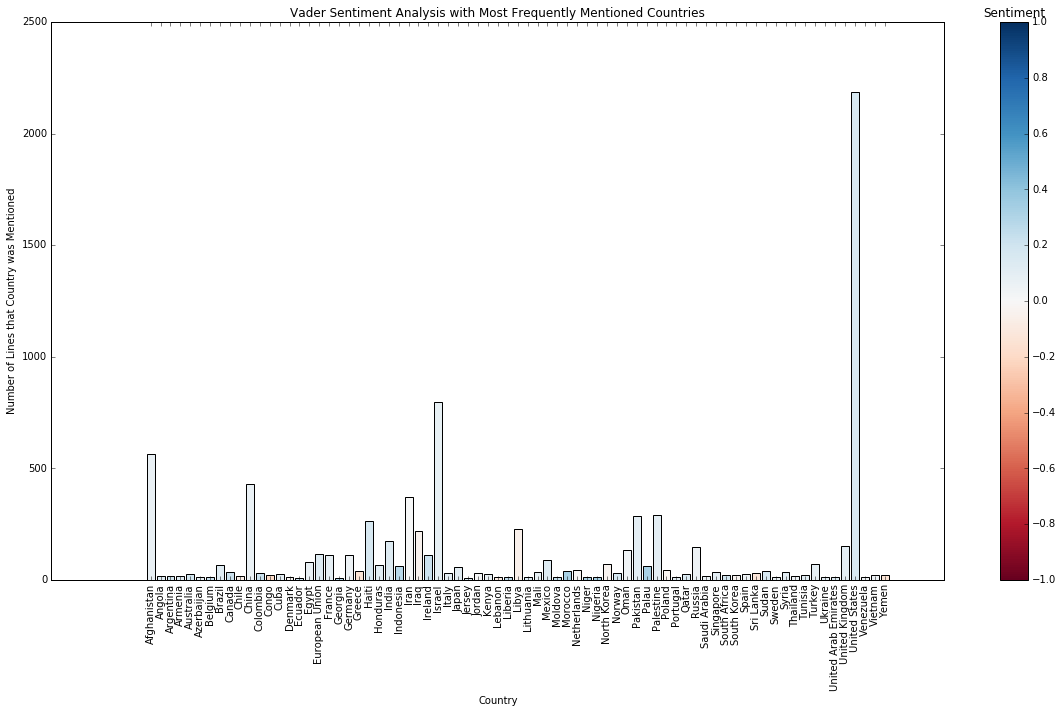

In [100]:
freq_countries = country_analysis_vader[country_analysis_vader.freq>=10]
print(len(freq_countries))
bar_plot_sentiments(freq_countries, title="Vader Sentiment Analysis with Most Frequently Mentioned Countries")

Let's just drop US since it is a clear outlier and makes it harder to visualize the other countries.

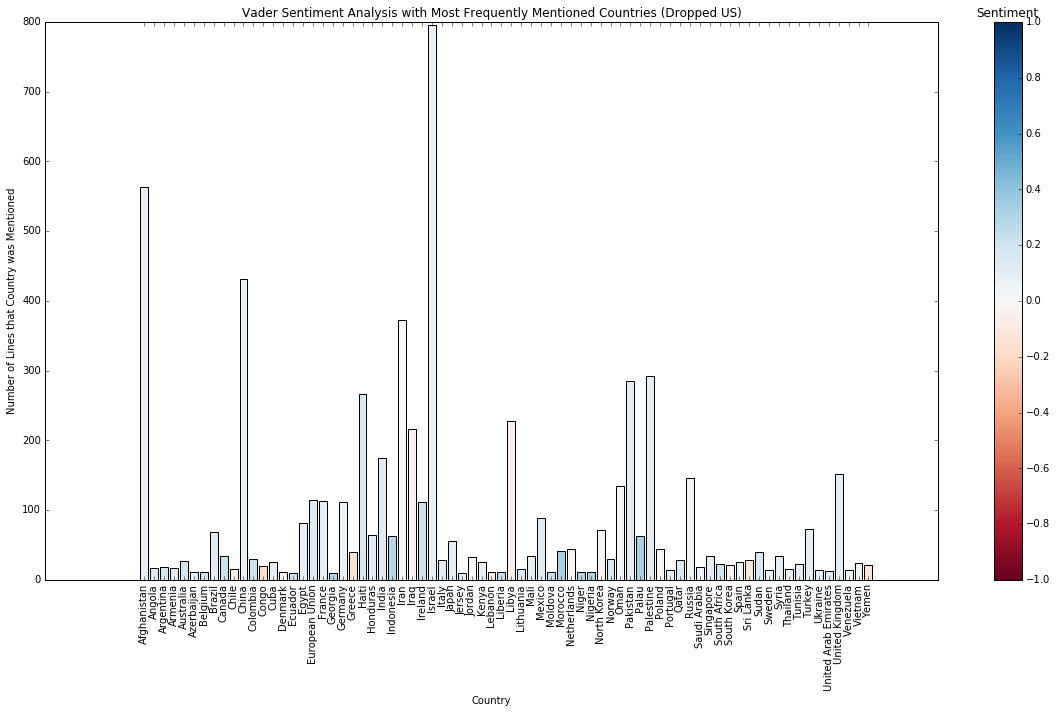

In [101]:
freq_countries = freq_countries[freq_countries.freq<1000]
bar_plot_sentiments(freq_countries, title="Vader Sentiment Analysis with Most Frequently Mentioned Countries (Dropped US)")

We can emphasize the difference between the perception of the countries by adjusting the limits of the colormap. This can be a dangerous thing to do as we are dropping the information that polarity score go between -1 and 1, thus it could lead to extreme conclusions. However, it is good for understanding the relative perception between countries and it can lead to a more visually pleasing visualization ;) We will set the limits to the maximum amplitude of the given scores (i.e. normalize the color values). This can be done by setting the `limit` argument of `bar_plot_sentiments` to `True`.

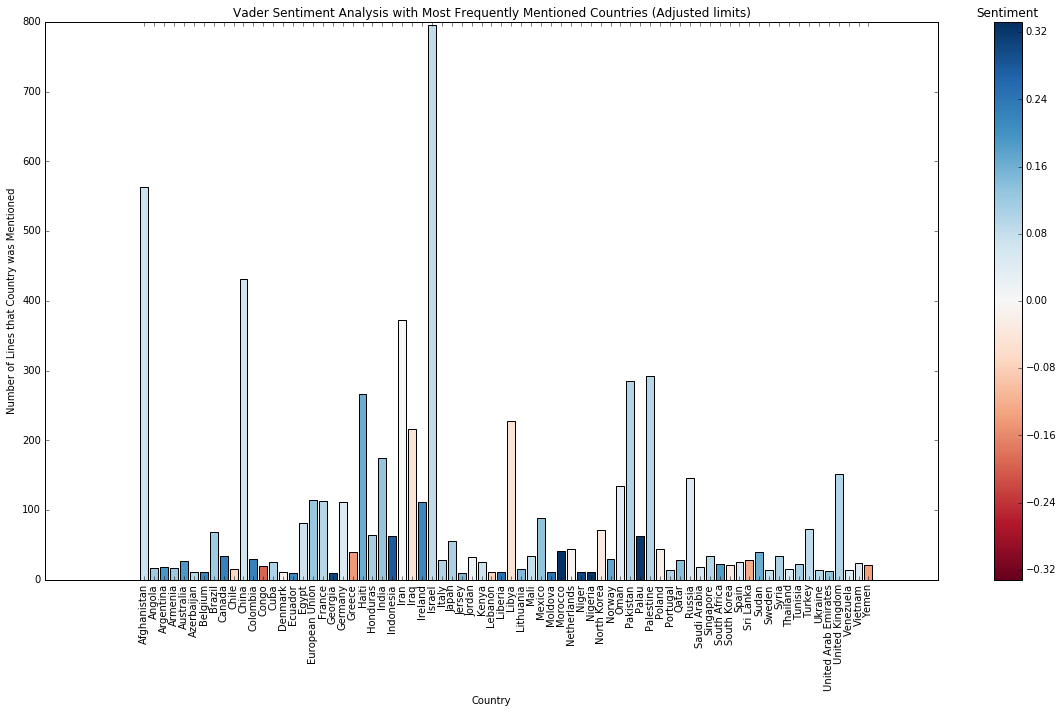

In [102]:
bar_plot_sentiments(freq_countries, limit=True, title="Vader Sentiment Analysis with Most Frequently Mentioned Countries (Adjusted limits)")

The difference in perception between the countries is now emphasized even more.

Let's check out the rest of the countries (without normalizing/adjusting the color values since the maximum amplitude is already 1).

88


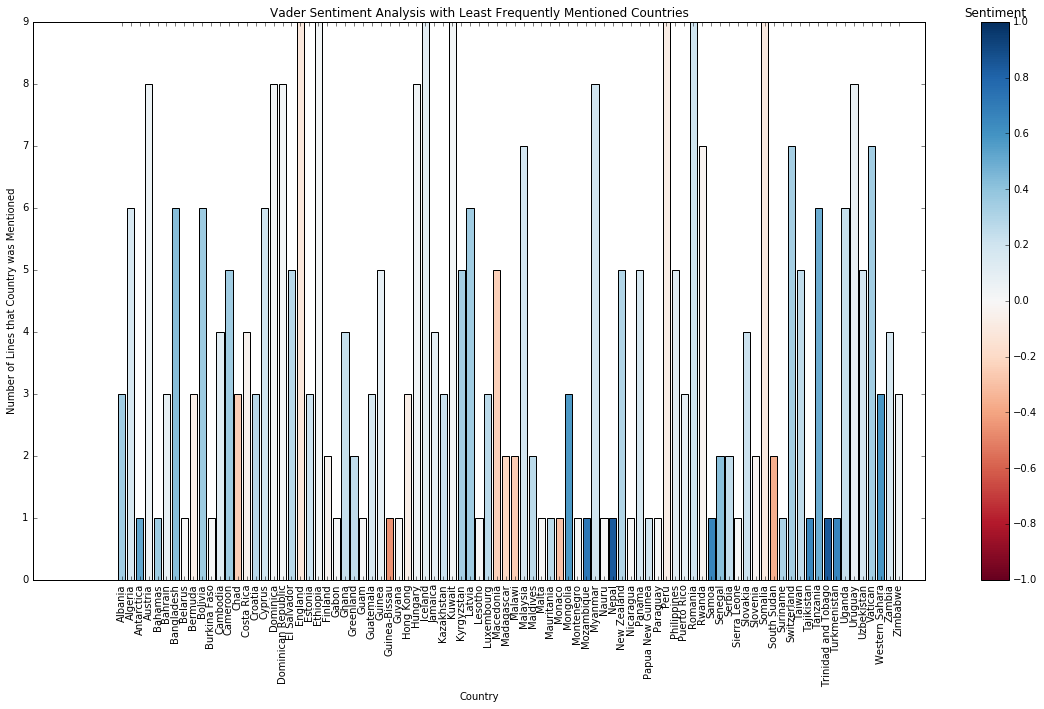

In [103]:
unfreq_countries = country_analysis_vader[country_analysis_vader.freq<10]
print(len(unfreq_countries))
bar_plot_sentiments(unfreq_countries, title="Vader Sentiment Analysis with Least Frequently Mentioned Countries" )

Even without normalizing, there are stark differences in the perceptions / colors. However, this is probably due to the fact that we have few examples to make an accurate estimate of the perception of such countries. Moreover, we can obverse that the darker colors / stronger perceptions are for those countries with only one "mention" in the email corpus.

#### Liu and Hu opinion lexicon

Now we will try the Liu and Hu opinion lexicon approach. However, we will use the modified version whose score we will compute by subtracting the negative ratio from the positive word ratio. The score of the original version can then be computed from this by using the sign function (https://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html).

In [72]:
country_sentiment_liu = {}
country_sentiment_liu_mod = {}
country_count = {}
email_num = 1
num_emails = len(emails.ExtractedBodyText)

# Step 1 - compute cumulative scores and number of mentions
for text in emails.ExtractedBodyText:
    
    #debug info
    if email_num % 1000 == 0:
        print("Email number %d/%d" % (email_num,num_emails))
    print("Email number %d/%d" % (email_num*1000,num_emails))
    email_num += 1
    
    if text is not np.nan:  # skip text if invalid
        # split text into lines
        lines_list = tokenize.sent_tokenize(text)
        # for each line search for countries and perform sentiment "analysis"
        for line in lines_list:
            countries_found = None
            countries_found = list(set([countries_dict[c] for c in countries_dict.keys() if c in line]))
            if countries_found is not None:  # if found country, perform sentiment analysis
                score = sentiment_liu_hu_mod(line)
                # update score for each country
                for country in countries_found:
                    try:
                        country_sentiment_liu_mod[country] += score
                        country_sentiment_liu[country] += np.sign(score)
                        country_count[country] += 1
                    except:  # if country not yet in dictionary
                        country_sentiment_liu_mod[country] = score
                        country_sentiment_liu[country] = np.sign(score)
                        country_count[country] = 1

Email number 1000/7945
Email number 2000/7945
Email number 3000/7945
Email number 4000/7945
Email number 5000/7945
Email number 6000/7945
Email number 7000/7945


In [73]:
# Step 2 - compute averaged scores
averaged_sentiment_liu_mod = {}
averaged_sentiment_liu = {}
for country in country_sentiment_liu_mod.keys():
    averaged_sentiment_liu_mod[country] = country_sentiment_liu_mod[country]/country_count[country]
    averaged_sentiment_liu[country] = country_sentiment_liu[country]/country_count[country]

We will now store this as a DataFrame and save to pickle for future use (so we can avoid hours of computation).

In [77]:
country_analysis_liu = pd.DataFrame([averaged_sentiment_liu,country_count]).transpose()
country_analysis_liu.columns = ['score', 'freq']
# pickle.dump(country_analysis_liu, open( "country_analysis_liu.p", "wb" ))
country_analysis_liu.head()

,score,freq
Afghanistan,0.113475,564.0
Albania,0.666667,3.0
Algeria,0.333333,6.0
Angola,0.176471,17.0
Antarctica,1.000000,1.0


In [78]:
country_analysis_liu_mod = pd.DataFrame([averaged_sentiment_liu_mod,country_count]).transpose()
country_analysis_liu_mod.columns = ['score', 'freq']
# pickle.dump(country_analysis_liu_mod, open( "country_analysis_liu_mod.p", "wb" ))
country_analysis_liu_mod.head()

,score,freq
Afghanistan,0.007669,564.0
Albania,0.020999,3.0
Algeria,0.009525,6.0
Angola,0.005458,17.0
Antarctica,0.062500,1.0


Now we can proceed to visualization as we did with Vader! First without normalizing / adjusting the limits.

In [79]:
country_analysis_liu = pickle.load( open( "country_analysis_liu.p", "rb" ) )
country_analysis_liu_mod = pickle.load( open( "country_analysis_liu_mod.p", "rb" ) )

First the most frequently mentioned countries.

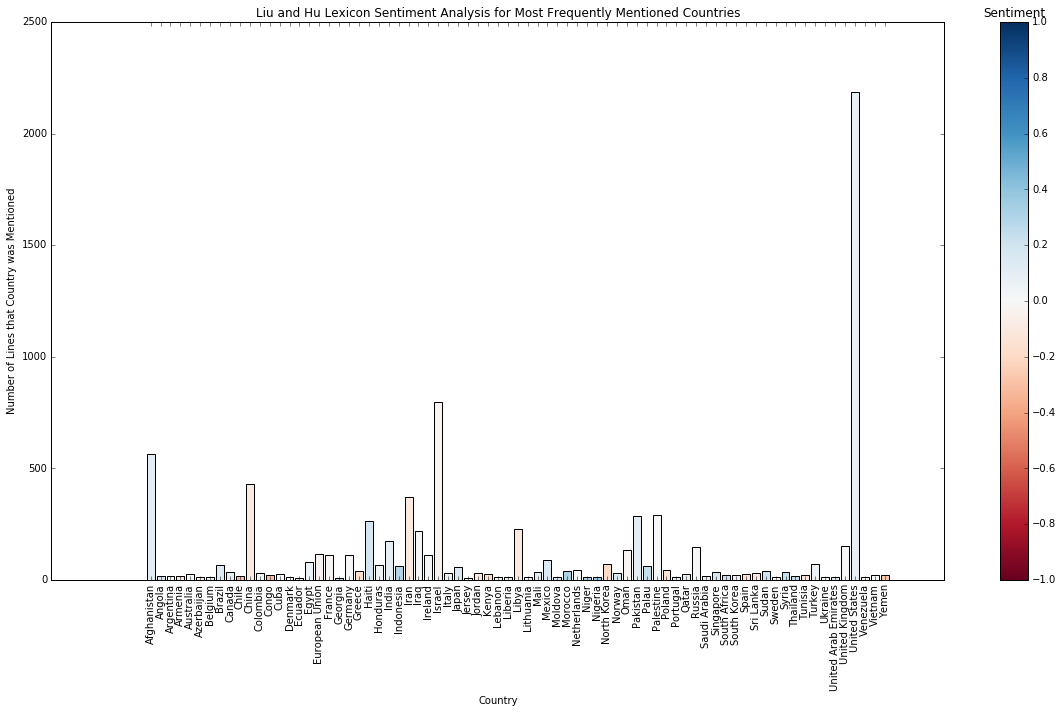

In [104]:
freq_countries = country_analysis_liu[country_analysis_liu.freq>=10]
bar_plot_sentiments(freq_countries, title="Liu and Hu Lexicon Sentiment Analysis for Most Frequently Mentioned Countries")

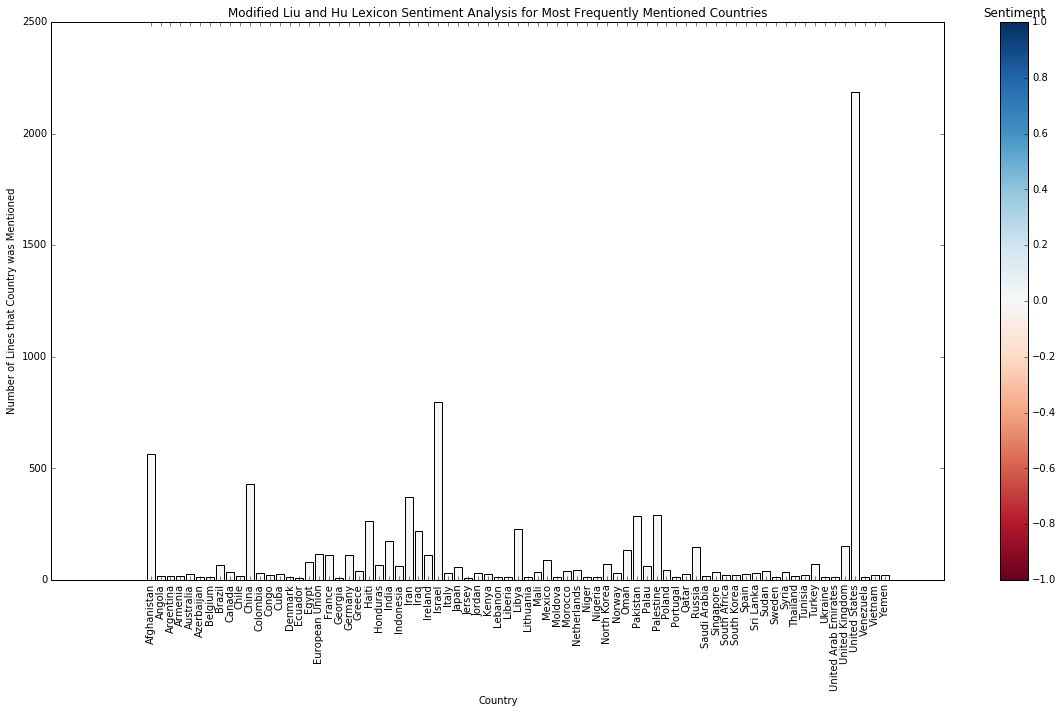

In [105]:
freq_countries = country_analysis_liu_mod[country_analysis_liu_mod.freq>=10]
bar_plot_sentiments(freq_countries, title="Modified Liu and Hu Lexicon Sentiment Analysis for Most Frequently Mentioned Countries")

Now the least frequently mentioned countries.

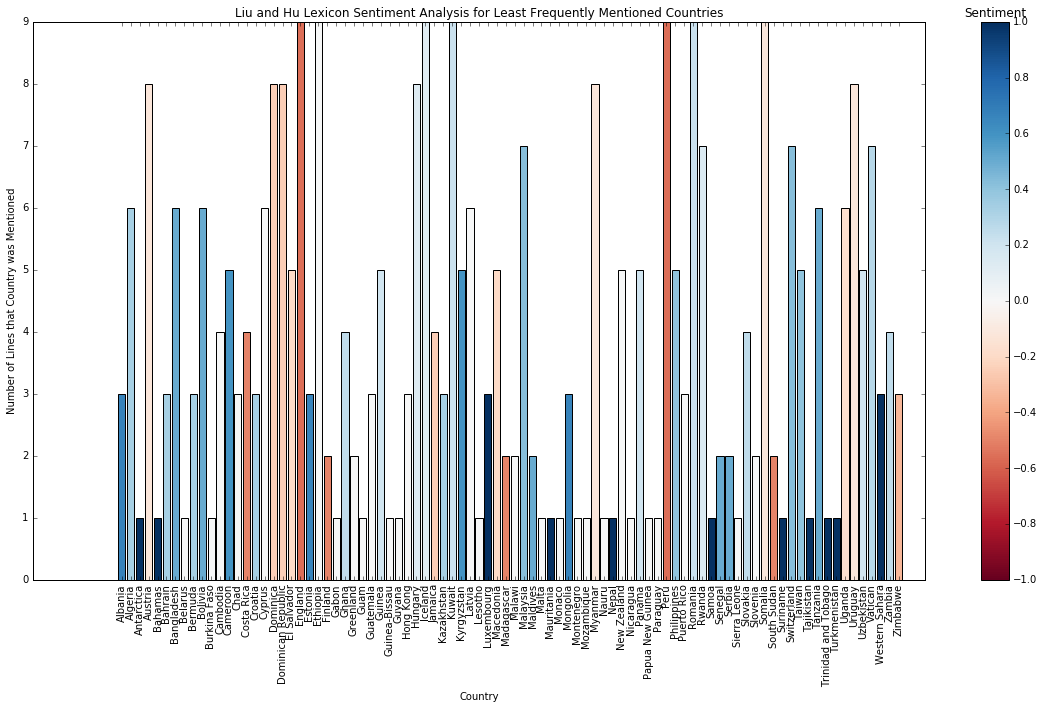

In [106]:
freq_countries = country_analysis_liu[country_analysis_liu.freq<10]
bar_plot_sentiments(freq_countries, title="Liu and Hu Lexicon Sentiment Analysis for Least Frequently Mentioned Countries")

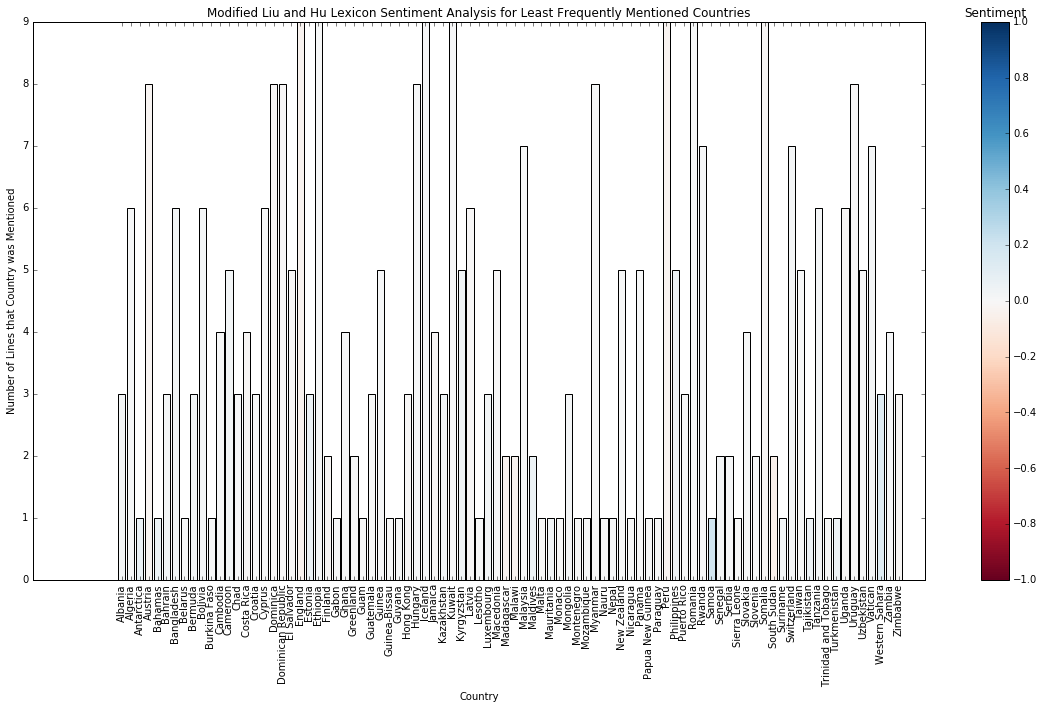

In [107]:
freq_countries = country_analysis_liu_mod[country_analysis_liu_mod.freq<10]
bar_plot_sentiments(freq_countries, title="Modified Liu and Hu Lexicon Sentiment Analysis for Least Frequently Mentioned Countries")

Now we will create the same four histograms as above but we will normalize / adjust the limits of the color mapping so that the difference between perception of countries is more enhanced. Also, we will drop the US since it has far more mentions than other countries.

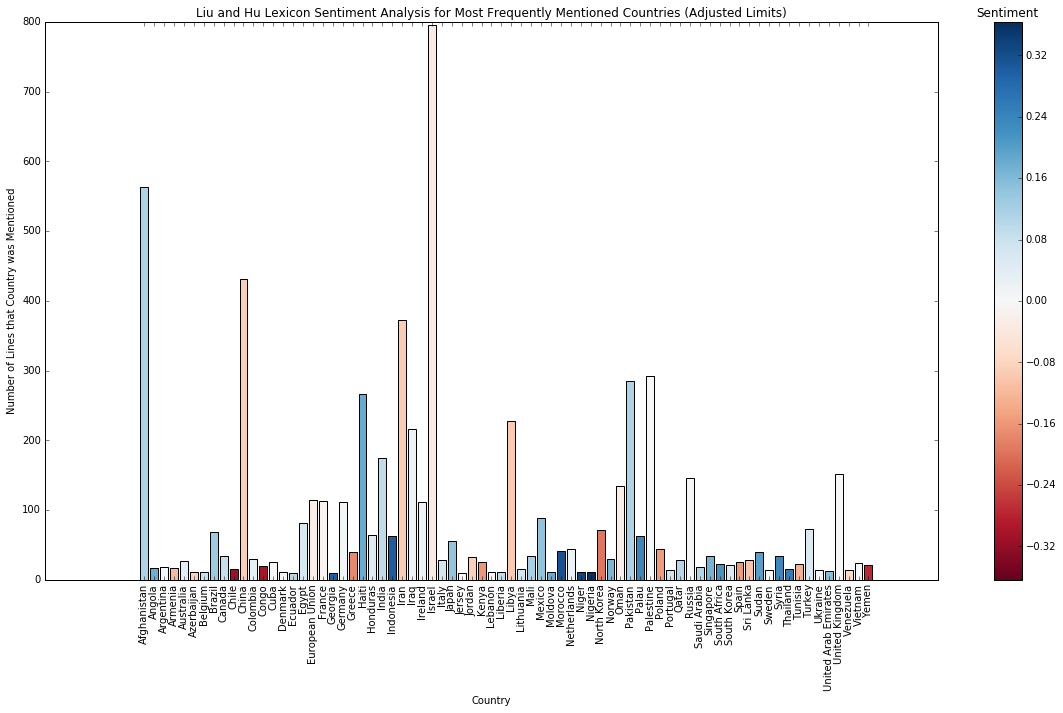

In [108]:
freq_countries = country_analysis_liu[country_analysis_liu.freq>=10]
freq_countries = freq_countries[freq_countries.freq<1000]
bar_plot_sentiments(freq_countries, limit=True, title="Liu and Hu Lexicon Sentiment Analysis for Most Frequently Mentioned Countries (Adjusted Limits)")

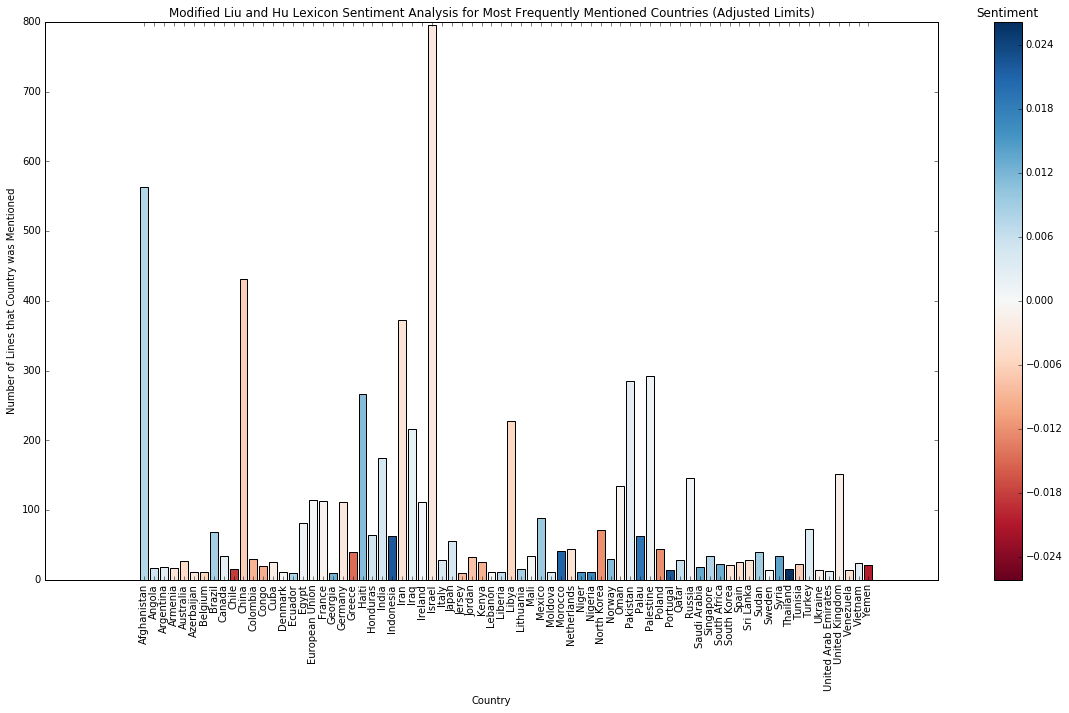

In [109]:
freq_countries = country_analysis_liu_mod[country_analysis_liu_mod.freq>=10]
freq_countries = freq_countries[freq_countries.freq<1000]
bar_plot_sentiments(freq_countries, limit=True, title="Modified Liu and Hu Lexicon Sentiment Analysis for Most Frequently Mentioned Countries (Adjusted Limits)")

When adjusting the limits for the most frequently mentioned countries, we (visually) observe little difference between the color mapping, suggesting that the relative perceptions are quite similar for the original and modified Liu and Hu approaches.

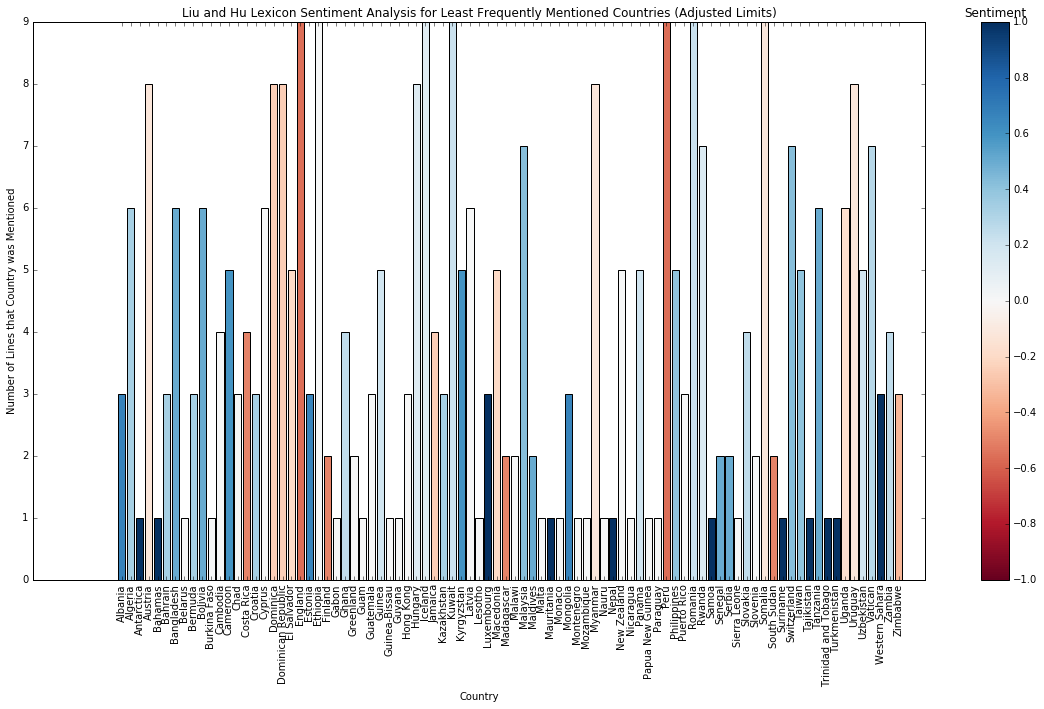

In [110]:
freq_countries = country_analysis_liu[country_analysis_liu.freq<10]
bar_plot_sentiments(freq_countries, limit=True, title="Liu and Hu Lexicon Sentiment Analysis for Least Frequently Mentioned Countries (Adjusted Limits)")

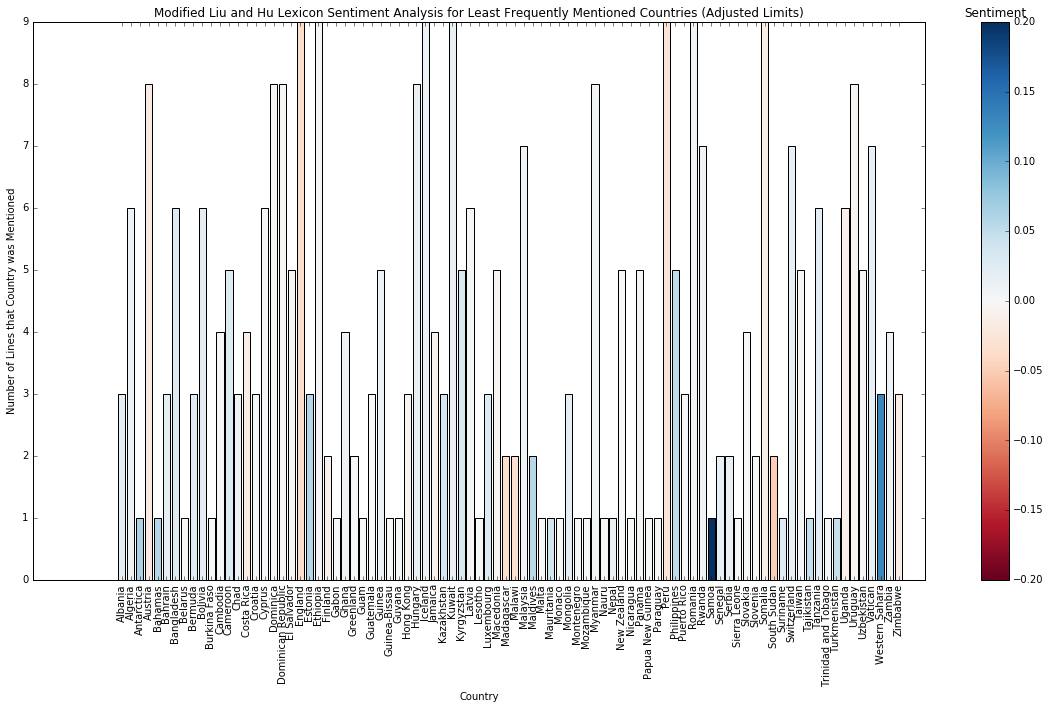

In [111]:
freq_countries = country_analysis_liu_mod[country_analysis_liu_mod.freq<10]
bar_plot_sentiments(freq_countries, limit=True, title="Modified Liu and Hu Lexicon Sentiment Analysis for Least Frequently Mentioned Countries (Adjusted Limits)")

For the least frequently mentioned countries, the modified version offers a visualization of relative perceptions that are less polarized. With the original version, we have darker colors on both sides, suggesting sharp differences between the perception of different countries. Perhaps, the modified version offers a better reflection of the perceptions of such countries because it is more difficult to get an idea of this with only a few mentions. Therefore, it's better to avoid polarizing results. The simple examle that we saw before ("The plot was good, but the characters are uncompelling and the dialog is not great.") seems consistent this.

### Comparison between sentiment analysis methods

Let's compare the results for the three different methods (with adjusted limits and without US) for the most frequently mentioned countries.

13


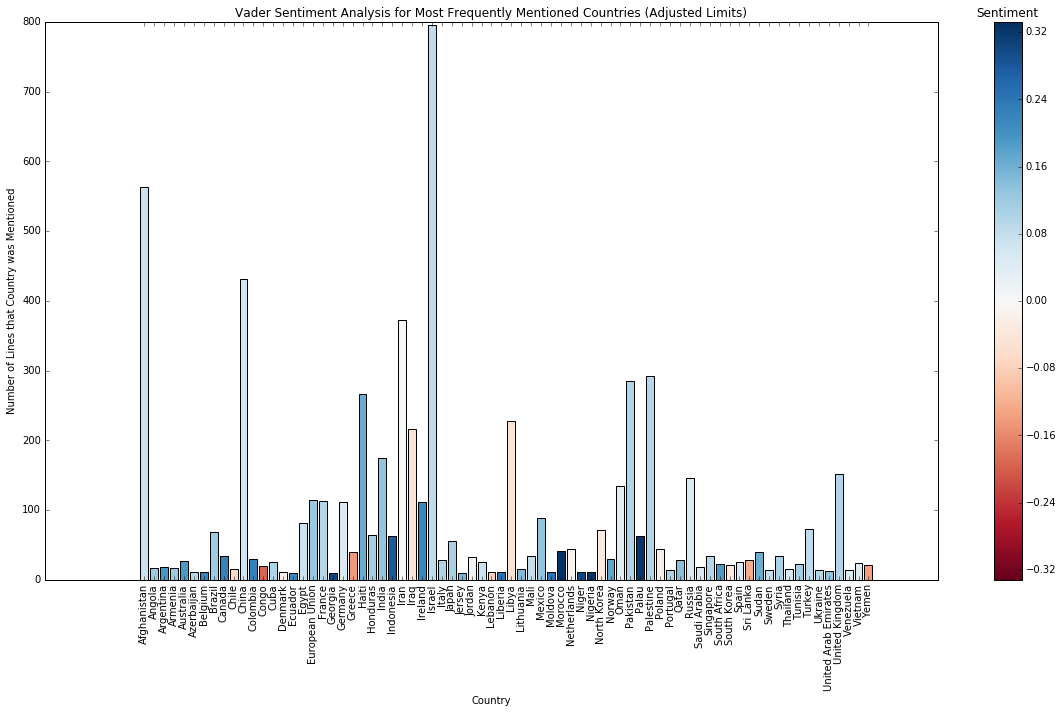

In [112]:
freq_countries = country_analysis_vader[country_analysis_vader.freq>=10]
freq_countries = freq_countries[freq_countries.freq<1000]
print(len(freq_countries[freq_countries.score<0]))
bar_plot_sentiments(freq_countries, limit=True, title="Vader Sentiment Analysis for Most Frequently Mentioned Countries (Adjusted Limits)")

21


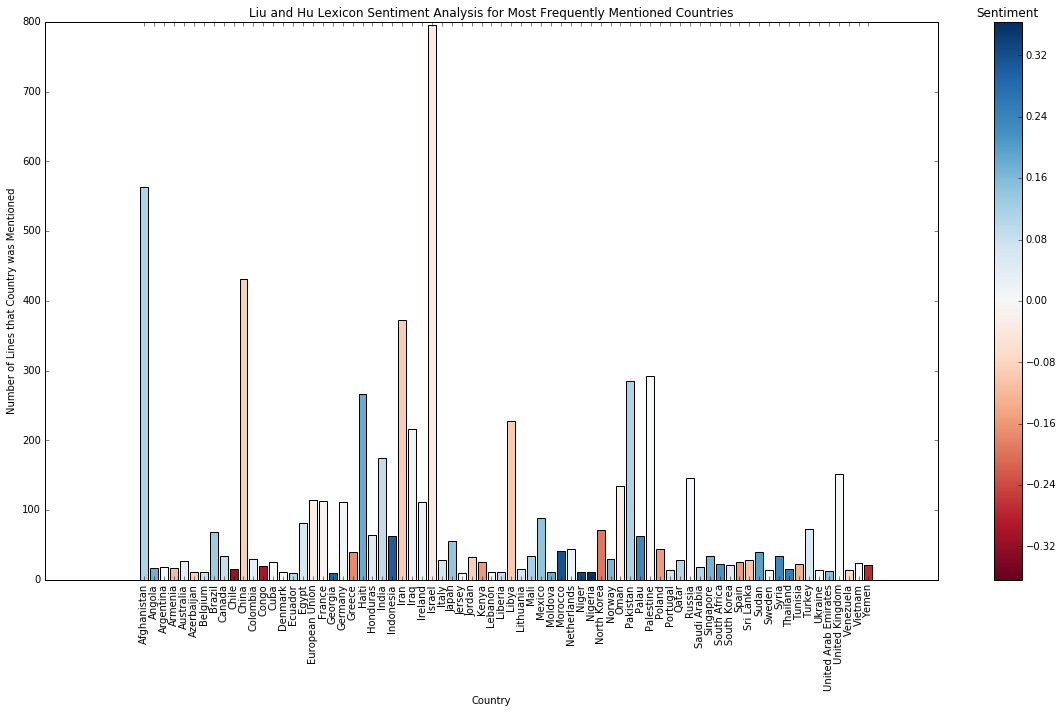

In [113]:
freq_countries = country_analysis_liu[country_analysis_liu.freq>=10]
freq_countries = freq_countries[freq_countries.freq<1000]
print(len(freq_countries[freq_countries.score<0]))
bar_plot_sentiments(freq_countries, limit=True, title="Liu and Hu Lexicon Sentiment Analysis for Most Frequently Mentioned Countries")

31


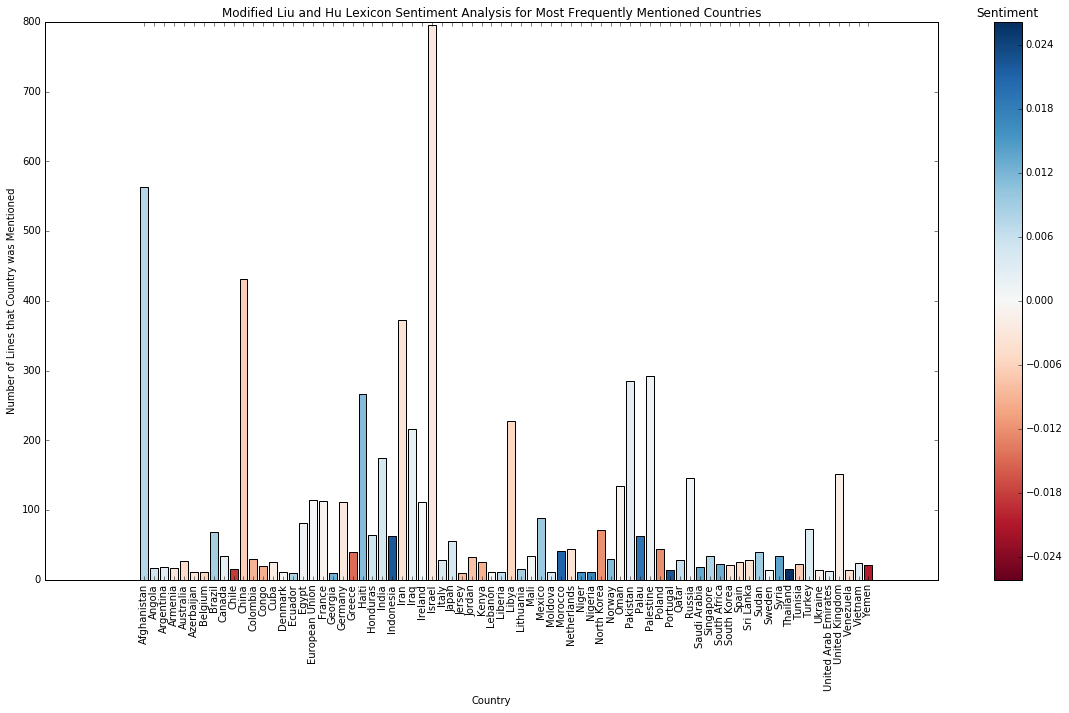

In [114]:
freq_countries = country_analysis_liu_mod[country_analysis_liu_mod.freq>=10]
freq_countries = freq_countries[freq_countries.freq<1000]
print(len(freq_countries[freq_countries.score<0]))
bar_plot_sentiments(freq_countries, limit=True, title="Modified Liu and Hu Lexicon Sentiment Analysis for Most Frequently Mentioned Countries")

With the Liu and Hu lexicon approach, we observe that more countries (21 for original and 31 for modified against 13 for Vader) fall in the "red" category, i.e. a negative perception. There are even three countries with a dark shade (corresponding to strongly negativate perception) - Chile, Congo, and Yemen.

Let's check out the least frequently mentioned countries.

16


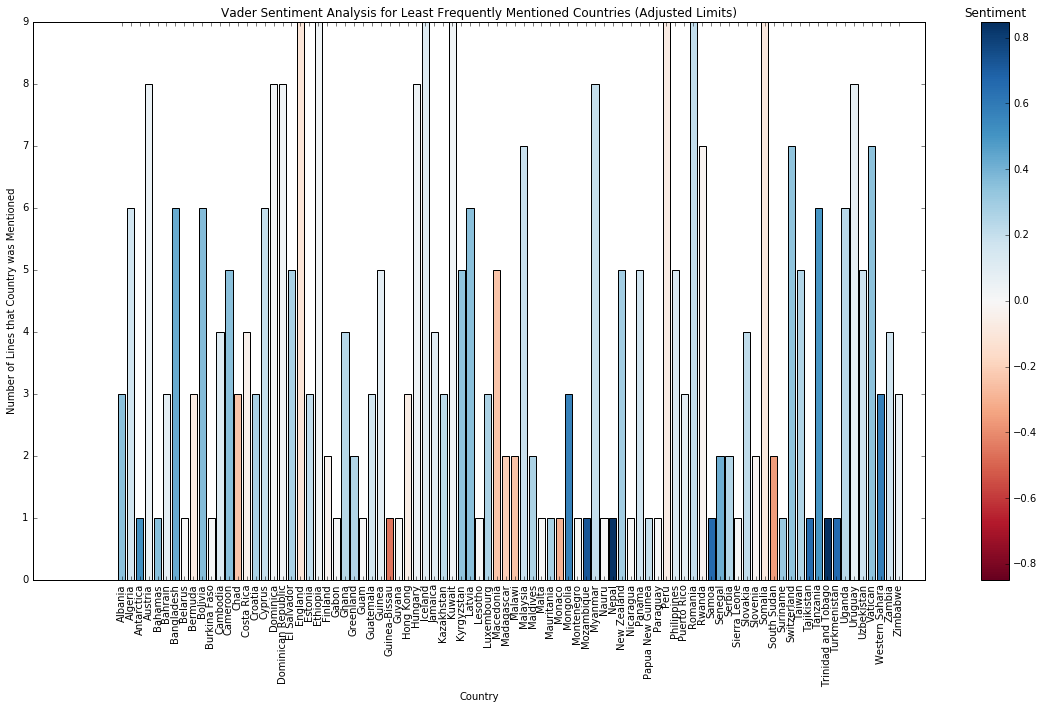

In [115]:
freq_countries = country_analysis_vader[country_analysis_vader.freq<10]
print(len(freq_countries[freq_countries.score<0]))
bar_plot_sentiments(freq_countries, limit=True, title="Vader Sentiment Analysis for Least Frequently Mentioned Countries (Adjusted Limits)")

17


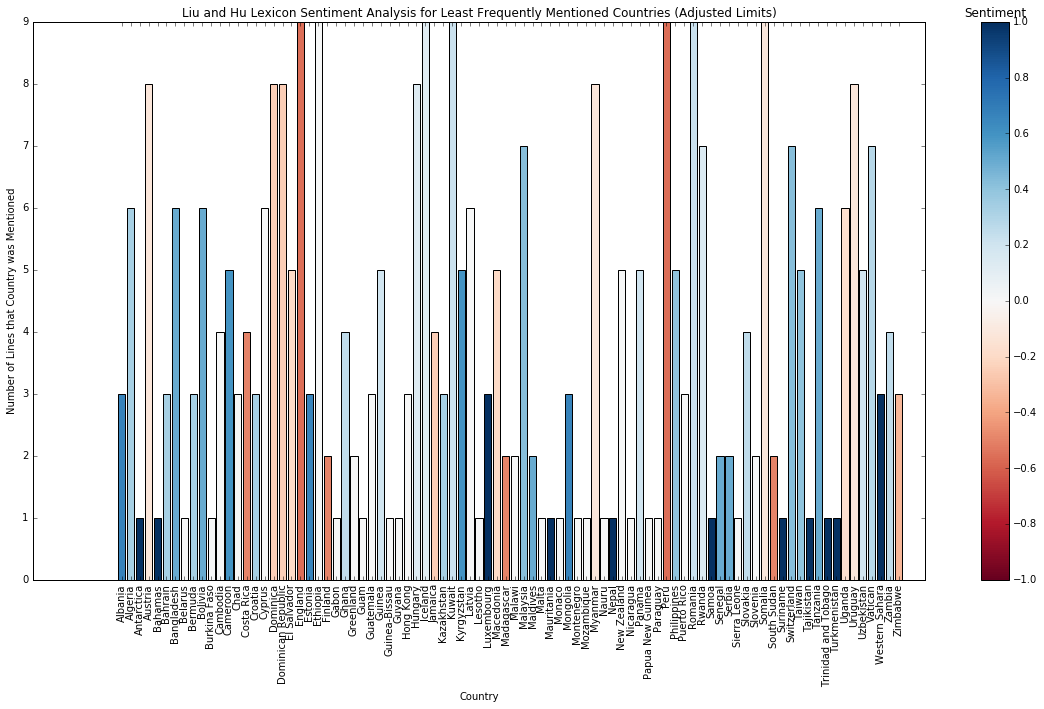

In [116]:
freq_countries = country_analysis_liu[country_analysis_liu.freq<10]
print(len(freq_countries[freq_countries.score<0]))
bar_plot_sentiments(freq_countries, limit=True, title="Liu and Hu Lexicon Sentiment Analysis for Least Frequently Mentioned Countries (Adjusted Limits)")

19


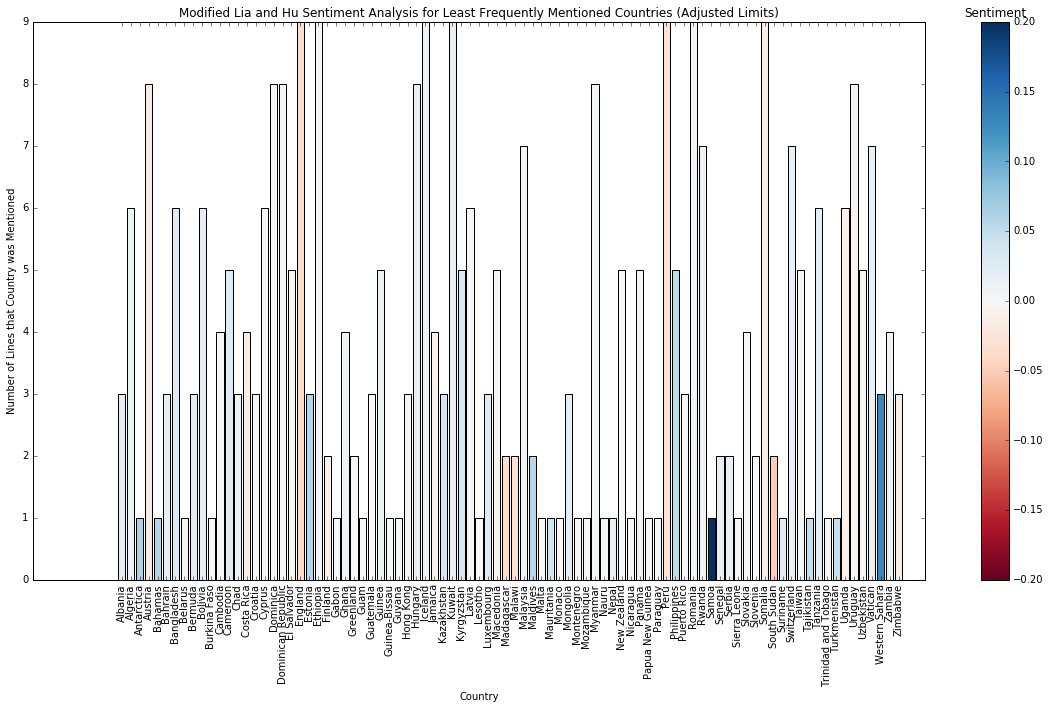

In [117]:
freq_countries = country_analysis_liu_mod[country_analysis_liu_mod.freq<10]
print(len(freq_countries[freq_countries.score<0]))
bar_plot_sentiments(freq_countries, limit=True, title="Modified Lia and Hu Sentiment Analysis for Least Frequently Mentioned Countries (Adjusted Limits)")

Both the original Liu and Hu and Vader approaches yield polarizing results for countries with few mentions, with Liu and Hu having more countries with darker shades (likely due to the "harsh" assignment of +1 and -1 for sentiment). The modified Liu and Hu approach offers less polarizing results for these countries with fewer mentions.